[INFO] Iniciando análise de churn...
[INFO] Arquivo CSV carregado com sucesso.
[INFO] Coluna de churn identificada: Churn

===== Resultados da Análise de Churn =====
Total de clientes: 20
Clientes que cancelaram (Yes): 7
Clientes retidos (No): 13
Taxa de Churn: 35.00%
Taxa de Retenção: 65.00%

Distribuição completa de categorias:
Churn
No     65.00%
Yes    35.00%
Name: proportion, dtype: object


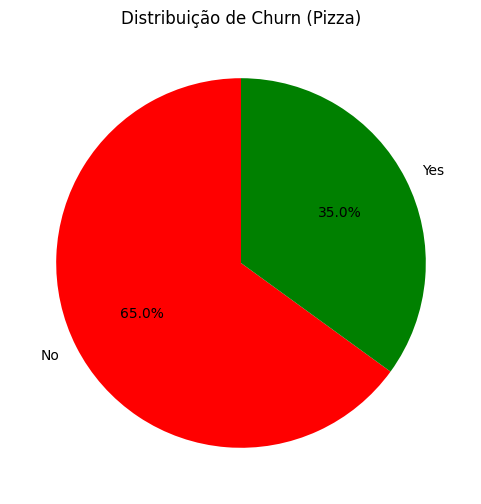

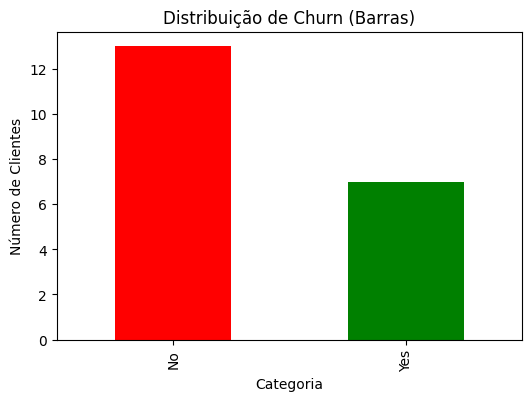

[INFO] Análise concluída com sucesso.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os


def carregar_dados(arquivo_csv: str) -> pd.DataFrame:
    """
    Carrega o arquivo CSV em um DataFrame do pandas.
    Faz tratamento de erro caso o arquivo não seja encontrado.
    """
    if not os.path.exists(arquivo_csv):
        print(f"[ERRO] Arquivo '{arquivo_csv}' não encontrado. Verifique o caminho e tente novamente.")
        sys.exit(1)
    try:
        df = pd.read_csv(arquivo_csv)
        print("[INFO] Arquivo CSV carregado com sucesso.")
        return df
    except Exception as e:
        print(f"[ERRO] Falha ao carregar o arquivo: {e}")
        sys.exit(1)


def identificar_coluna_churn(df: pd.DataFrame) -> str:
    """
    Identifica automaticamente a coluna de churn,
    independentemente de maiúsculas/minúsculas.
    """
    for col in df.columns:
        if col.strip().lower() == "churn":
            print(f"[INFO] Coluna de churn identificada: {col}")
            return col
    print("[ERRO] Nenhuma coluna de churn encontrada no dataset.")
    sys.exit(1)


def padronizar_churn(df: pd.DataFrame, coluna_churn: str) -> pd.Series:
    """
    Padroniza os valores da coluna churn para 'Yes' e 'No',
    tratando variações de maiúsculas/minúsculas e espaços extras.
    """
    churn_series = df[coluna_churn].astype(str).str.strip().str.lower()
    churn_series = churn_series.map(lambda x: "Yes" if x == "yes" else ("No" if x == "no" else "Outro"))
    return churn_series


def analisar_churn(churn_series: pd.Series):
    """
    Analisa a taxa de churn e imprime estatísticas detalhadas.
    """
    total_clientes = len(churn_series)
    churn_yes = (churn_series == "Yes").sum()
    churn_no = (churn_series == "No").sum()

    taxa_churn = (churn_yes / total_clientes) * 100 if total_clientes > 0 else 0
    taxa_retenção = (churn_no / total_clientes) * 100 if total_clientes > 0 else 0

    print("\n===== Resultados da Análise de Churn =====")
    print(f"Total de clientes: {total_clientes}")
    print(f"Clientes que cancelaram (Yes): {churn_yes}")
    print(f"Clientes retidos (No): {churn_no}")
    print(f"Taxa de Churn: {taxa_churn:.2f}%")
    print(f"Taxa de Retenção: {taxa_retenção:.2f}%")
    print("\nDistribuição completa de categorias:")
    print(churn_series.value_counts(normalize=True).map(lambda x: f"{x:.2%}"))


def gerar_graficos(churn_series: pd.Series):
    """
    Gera gráficos de pizza e barras mostrando a distribuição de churn.
    """
    counts = churn_series.value_counts()

    # Gráfico de pizza
    plt.figure(figsize=(6, 6))
    counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["red", "green", "gray"])
    plt.title("Distribuição de Churn (Pizza)")
    plt.ylabel("")  # remove o rótulo do eixo Y
    plt.show()

    # Gráfico de barras
    plt.figure(figsize=(6, 4))
    counts.plot(kind="bar", color=["red", "green", "gray"])
    plt.title("Distribuição de Churn (Barras)")
    plt.xlabel("Categoria")
    plt.ylabel("Número de Clientes")
    plt.show()


def main():
    """
    Função principal que executa a análise de churn.
    """
    print("[INFO] Iniciando análise de churn...")
    arquivo_csv = "churn_data.csv"  # Altere o caminho se necessário

    df = carregar_dados(arquivo_csv)
    coluna_churn = identificar_coluna_churn(df)
    churn_series = padronizar_churn(df, coluna_churn)

    analisar_churn(churn_series)
    gerar_graficos(churn_series)
    print("[INFO] Análise concluída com sucesso.")


if __name__ == "__main__":
    main()

